In [1]:
pip install tensorflow

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [7]:
# Define the model
model= Sequential([Dense(64,activation = 'relu'),Dense(32,activation = 'relu'),Dense(1,activation = 'sigmoid')])

In [9]:
# compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics = ['accuracy'])

In [11]:
# see the summary of model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
pip install torch torchvision torchaudio

Note: you may need to restart the kernel to use updated packages.


In [22]:
# used for image processing 
# define dataset transfroms
import torchvision.transforms as transforms
transform = transforms.Compose([transforms.Resize((128,128)),transforms.ToTensor(),transforms.Normalize(mean=[0.485,0.456,0.406],std = [0.229,0.224,0.225])])

In [34]:
# load the dataset
import torchvision
import torch
import torchvision.transforms as transforms
train_dataset = torchvision.datasets.CIFAR10(root = './data', train = True, download = True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 32,shuffle = True)

100%|██████████| 170M/170M [12:59<00:00, 219kB/s]  


In [38]:
# load a pretained model
from torchvision.models import resnet18
model = resnet18(pretrained = True)# Load the pretained ResNet-18 model
model.fc = torch.nn.Linear(512,10)# Adjust final layer of 10 classes

C:\Users\rutuj\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\rutuj\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\rutuj/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:01<00:00, 27.1MB/s]


In [40]:
# Define loss function and optimizer
# learning rate 0.001
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
# cross - entropy loss
criterion = torch.nn.CrossEntropyLoss()

In [ ]:
# Training Loop
for epoch in range(2): # training for 2 epochs
    for images, labels in train_loader :
        outputs = model(images)# forward pass
        loss = criterion(outputs,labels)# compute loss
        optimizer.zero_grad()# reset gradients
        loss.backward() #backward pass
        optimizer.step()
        print(f'loss:{loss.item()}')

loss:2.645261287689209
loss:2.0268518924713135
loss:1.6332920789718628
loss:1.7835092544555664
loss:1.1832606792449951
loss:1.7163349390029907
loss:1.512123703956604
loss:1.3936922550201416
loss:1.3428270816802979
loss:1.40238618850708
loss:1.9980340003967285
loss:1.3856544494628906
loss:1.422829508781433
loss:1.4575930833816528
loss:1.6140644550323486
loss:1.5347895622253418
loss:1.3097312450408936
loss:1.2308101654052734
loss:1.6494200229644775
loss:1.8995565176010132
loss:1.7511532306671143
loss:1.8329976797103882
loss:1.26046884059906
loss:1.927242398262024
loss:1.374740719795227
loss:1.393144130706787
loss:1.6784613132476807
loss:1.4370505809783936
loss:1.2311732769012451
loss:1.4842299222946167
loss:1.4744597673416138
loss:1.6855279207229614
loss:1.4933278560638428
loss:1.7596279382705688
loss:1.084672451019287
loss:1.333665370941162
loss:1.1064505577087402
loss:1.7326661348342896
loss:1.2732847929000854
loss:1.808557391166687
loss:1.3023122549057007
loss:1.3552069664001465
loss:

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.linear_model import LinearRegression

In [27]:
df = pd.read_csv('crop_yield_data(in).csv')

In [29]:
df

,temperature,humidity,rainfall,soil_quality,fertilizer_used,crop_yield
0,25,60,50,7,200,2000
1,28,65,60,6,220,2200
2,24,58,40,8,180,1800
3,26,62,55,7,210,2100
4,22,59,45,6,190,1900
5,30,70,70,7,250,2500
6,23,64,65,6,240,2300
7,27,63,50,8,200,2200
8,29,68,75,7,230,2400
9,25,60,55,6,210,2100


In [31]:
X = df.drop('crop_yield',axis=1)
y = df['crop_yield']

In [33]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
# create a linear regression model
model = LinearRegression()
# 
model.fit(X_train, y_train)

LinearRegression()

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(64,input_dim= X_train.shape[1],activation = 'relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation = 'linear'))

C:\Users\rutuj\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [61]:
model.compile(optimizer = 'adam',loss= 'mse',metrics = ['accuracy'])

In [75]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,493 (29.27 KB)

 Trainable params: 2,497 (9.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,996 (19.52 KB)

In [63]:
model.fit(X_train, y_train, epochs =100, batch_size=10)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 659ms/step - accuracy: 0.0000e+00 - loss: 4505047.5000
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.0000e+00 - loss: 4504848.0000
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.0000e+00 - loss: 4504647.0000
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.0000e+00 - loss: 4504447.0000
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.0000e+00 - loss: 4504247.0000
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.0000e+00 - loss: 4504051.0000
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.0000e+00 - loss: 4503856.0000
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.0000e+00 - loss: 4503665.5000
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.0000e+00 - loss: 4503473.5000
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.0000e+00 - loss: 4503285.0000
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accur

In [67]:
loss = model.evaluate(X_test, y_test)
print(f'test loss:{loss}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.0000e+00 - loss: 5183323.5000
test loss:[5183323.5, 0.0]


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [69]:
df = pd.read_csv('predict_energy_consumption(in).csv')

In [71]:
df

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
0,24.363503,31.107976,5.234114,705.432695,307.398145
1,38.767858,52.514057,4.939576,817.013258,412.444548
2,33.299849,72.376750,18.125092,325.421109,392.072418
3,29.966462,63.933493,4.990924,662.386690,119.254957
4,18.900466,68.393669,5.438995,614.571385,117.162261
...,...,...,...,...,...
995,17.289552,59.417309,17.305915,497.896331,453.828793
996,37.932839,77.396877,3.145464,400.961061,103.721455
997,18.420466,24.137481,6.195757,455.115084,197.529277
998,38.755934,23.423283,5.800911,576.946528,417.085421


In [83]:
X = df[['temperature','humidity','humidity','solar_irradiance']].values
y = df['energy_consumption'].values

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [89]:
# create a linear regression model
model = LinearRegression()
# 
model.fit(X_train, y_train)

LinearRegression()

In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(64,input_dim= X_train.shape[1],activation = 'relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation = 'linear'))

C:\Users\rutuj\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [93]:
model.compile(optimizer = 'adam',loss= 'mse',metrics = ['accuracy'])

In [95]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,433 (9.50 KB)

 Trainable params: 2,433 (9.50 KB)

 Non-trainable params: 0 (0.00 B)

In [119]:
history = model.fit(X_train,y_train,epochs=50,batch_size=32,validation_split=0.2,verbose=1,)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0000e+00 - loss: 16900.3320 - val_accuracy: 0.0000e+00 - val_loss: 16713.3066
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 16262.4756 - val_accuracy: 0.0000e+00 - val_loss: 16782.6621
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 15678.1543 - val_accuracy: 0.0000e+00 - val_loss: 16827.6914
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 16366.5195 - val_accuracy: 0.0000e+00 - val_loss: 16800.3008
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 17044.4531 - val_accuracy: 0.0000e+00 - val_loss: 16845.3223
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 15931.7451 - val_accuracy: 0.0000e+00 - val_loss: 16845.3086
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 17030.9590 - val_accuracy: 0.0000e+00 - val_loss: 16858.1992
Epoch 

In [ ]:
test_loss,test_mae = model.evaluate(X_test,y_test,verbose=1)
print(f"Test Mean Absolute Error :{test_mae:.2f}")

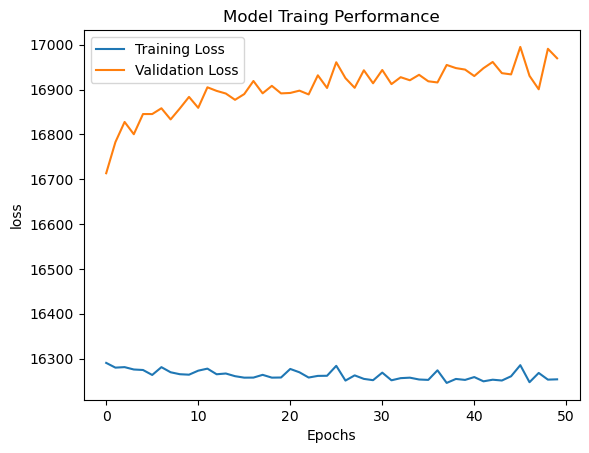

In [121]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('Model Traing Performance')
plt.legend()
plt.show()

In [111]:
test_loss,test_mae = model.evaluate(X_test, y_test,verbose =1)
print(f'test mean absolute error:{test_mae:}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 17203.0078 
test mean absolute error:0.0


In [113]:
predictions = model.predict(X_test)
predictions

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


array([[271.8304 ],
       [263.06467],
       [264.047  ],
       [261.78918],
       [297.15698],
       [274.62668],
       [279.50565],
       [283.77756],
       [272.4086 ],
       [263.51923],
       [269.14896],
       [271.6913 ],
       [264.40677],
       [256.449  ],
       [273.8453 ],
       [274.82083],
       [266.25464],
       [278.95224],
       [269.43716],
       [254.63446],
       [261.83987],
       [277.37888],
       [254.34248],
       [250.93987],
       [269.0378 ],
       [266.887  ],
       [268.00436],
       [282.04623],
       [268.48438],
       [264.615  ],
       [264.51114],
       [296.8325 ],
       [262.5175 ],
       [269.9399 ],
       [293.61368],
       [297.78976],
       [262.99405],
       [273.2111 ],
       [256.55823],
       [263.37912],
       [273.38147],
       [271.6523 ],
       [264.8655 ],
       [269.51062],
       [269.65918],
       [271.23596],
       [270.37845],
       [254.70363],
       [268.20346],
       [268.14948],


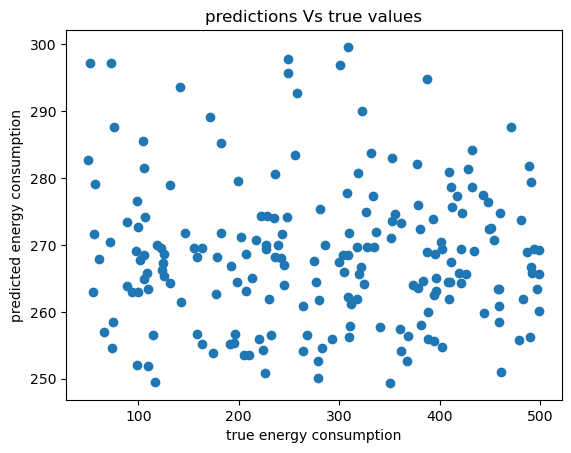

In [115]:
plt.scatter(y_test, predictions)
plt.xlabel('true energy consumption')
plt.ylabel('predicted energy consumption')
plt.title('predictions Vs true values')
plt.show()